# Domain:
Banking

# Context:
Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.

# Objective:
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [84]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
# Read the data as a data frame
bank_data = pd.read_csv("bank-full.csv")

In [86]:
# Sample of dataset
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [87]:
# Perform basic EDA
# Shape of the data
bank_data.shape

(45211, 17)

In [88]:
# Data type of each attribute
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [89]:
# Checking the presence of missing values
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

#### Fortunately, there are no missing values. If there were missing values we will have to fill them with the median, mean or mode.


In [90]:
# 5 Point summary of numerical attributes
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Observations :

1. Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)
2. The mean balance is 1,362. However, the Standard Deviation (std) is a high number so we can understand through this 
   that the balance is heavily distributed across the dataset.
3. As the data information said it will be better to drop the duration column since duration is highly correlated in 
   whether a potential client will buy a term deposit. Also, duration is obtained after the call is made to the potential 
   client so if the target client has never received calls this feature is not that useful. The reason why duration is 
   highly correlated with opening a term deposit is because the more the bank talks to a target client the higher the 
   probability the target client will open a term deposit since a higher duration means a higher interest (commitment) 
   from the potential client.

**Note: There are not that much insights we can gain from the descriptive dataset since most of our descriptive data is 
        located not in the "numeric" columns but in the "categorical columns".**

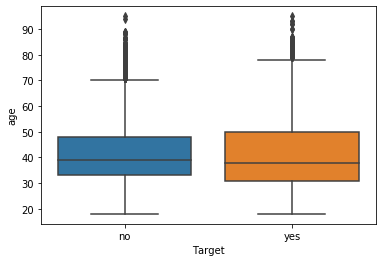

In [91]:
# Checking the presence of outliers
sns.boxplot(x="Target", y="age", data=bank_data)

In [92]:
def box_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    mask = (series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)
    series = series[mask]
    return series

bank_data_outliers = pd.DataFrame([])

for i in bank_data.copy().Target.unique():
    bank_data_age_outlier = bank_data.copy().sort_values(['Target'])
    bank_data_age_outlier = bank_data_age_outlier.loc[bank_data_age_outlier['Target'] == i, :].reset_index(drop=True)
    bank_data_age_outlier = bank_data_age_outlier[['Target', 'age']].set_index('Target').apply(box_outliers)
    bank_data_age_outlier = bank_data_age_outlier.reset_index()
    bank_data_outliers = bank_data_outliers.append(bank_data_age_outlier)

In [93]:
bank_data_outliers.reset_index(drop=True)
print(bank_data_outliers.loc[bank_data_outliers['Target'] == 'no'].sort_values('age'))

    Target  age
134     no   71
183     no   71
25      no   71
177     no   71
170     no   71
..     ...  ...
88      no   89
149     no   89
127     no   89
6       no   94
214     no   95

[269 rows x 2 columns]


#### There are 269 outliers for Target = no and age >= 71

In [94]:
print(bank_data_outliers.loc[bank_data_outliers['Target'] == 'yes'].sort_values('age'))

   Target  age
0     yes   79
35    yes   79
61    yes   79
40    yes   79
6     yes   79
..    ...  ...
11    yes   92
57    yes   92
39    yes   93
27    yes   93
46    yes   95

[65 rows x 2 columns]


#### There are 65 outliers for Target = yes and age >= 79

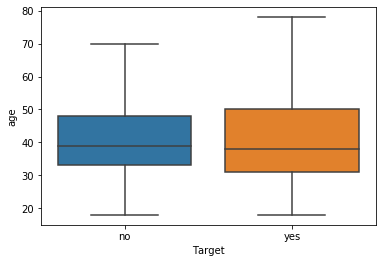

In [95]:
# Removing the outliers from dataset
bank_data_no_outlier = bank_data.copy()
bank_data_no_outlier = bank_data_no_outlier[~((bank_data_no_outlier['Target'] == 'no') & (bank_data_no_outlier['age'] >= 71))]
bank_data_no_outlier = bank_data_no_outlier[~((bank_data_no_outlier['Target'] == 'yes') & (bank_data_no_outlier['age'] >= 79))]
bank_data_no_outlier.reset_index(inplace=True)
sns.boxplot(x="Target", y="age", data=bank_data_no_outlier)

#### Note : There are no more outliers and we can proceed further with classification process.

In [96]:
# Converting the yes/no columns to 1/0 columns
bank_data_no_outlier['Target'] = bank_data_no_outlier.Target.map(dict(yes=1, no=0))
bank_data_no_outlier['default'] = bank_data_no_outlier.default.map(dict(yes=1, no=0))
bank_data_no_outlier['housing'] = bank_data_no_outlier.housing.map(dict(yes=1, no=0))
bank_data_no_outlier['loan'] = bank_data_no_outlier.loan.map(dict(yes=1, no=0))

              job    Target
8         student  0.286780
5         retired  0.230926
10     unemployed  0.155027
4      management  0.137672
0          admin.  0.122074
11        unknown  0.120141
6   self-employed  0.118580
9      technician  0.110585
7        services  0.088830
3       housemaid  0.087205
2    entrepreneur  0.082155
1     blue-collar  0.072772


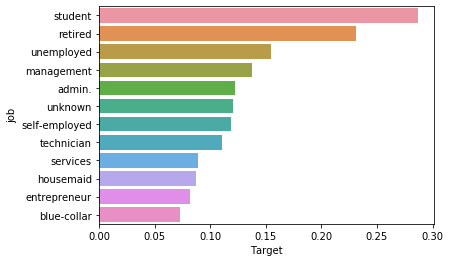

In [97]:
# Corelation of all other features with the outcome
# 1. Job
job_Target_corr = bank_data_no_outlier[['job', 'Target']].groupby('job').mean().reset_index().sort_values('Target', ascending=False)
sns.barplot(y = 'job', x = 'Target',data = job_Target_corr)
print(job_Target_corr)

### Observations :
1. Looks like students have the highest mean of all followed by retired.
2. The above graph shows close score for self-employed and unkown, hence its okay to consider the unknown as self-employed.

['management' 'technician' 'entrepreneur' 'blue-collar' 'self-employed'
 'retired' 'admin.' 'services' 'unemployed' 'housemaid' 'student']
              job    Target
8         student  0.286780
5         retired  0.230926
10     unemployed  0.155027
4      management  0.137672
0          admin.  0.122074
6   self-employed  0.118817
9      technician  0.110585
7        services  0.088830
3       housemaid  0.087205
2    entrepreneur  0.082155
1     blue-collar  0.072772


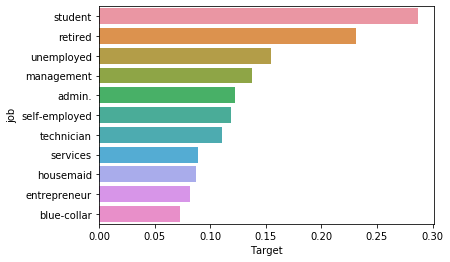

In [98]:
# Replacing 'unknown' with 'self-employed' for bank_data_no_outlier['job']
bank_data_no_outlier.loc[bank_data_no_outlier.job == 'unknown', 'job'] = 'self-employed'
print(bank_data_no_outlier['job'].unique())
job_Target_corr_new = bank_data_no_outlier[['job', 'Target']].groupby('job').mean().reset_index().sort_values('Target', ascending=False)
sns.barplot(y = 'job', x = 'Target',data = job_Target_corr_new)
print(job_Target_corr_new)

   education    Target
2   tertiary  0.150438
3    unknown  0.135965
1  secondary  0.105270
0    primary  0.082175


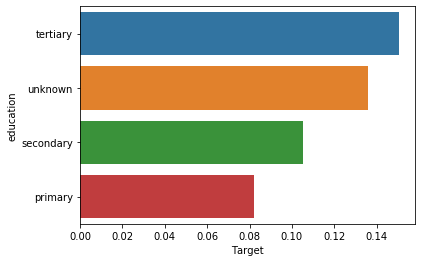

In [99]:
# 2. Education
education_Target_corr = bank_data_no_outlier[['education', 'Target']].groupby('education').mean().reset_index().sort_values('Target', ascending=False)
sns.barplot(y = 'education', x = 'Target',data = education_Target_corr)
print(education_Target_corr)

#### The above graph shows close score for tertiary and unkown, hence its okay to consider the unknown as tertiary.

['tertiary' 'secondary' 'primary']
   education    Target
2   tertiary  0.148686
1  secondary  0.105270
0    primary  0.082175


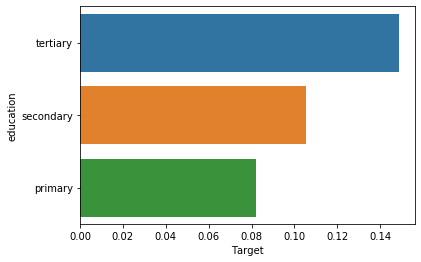

In [100]:
# Replacing 'unknown' with 'tertiary' for bank_data_no_outlier['education']
bank_data_no_outlier.loc[bank_data_no_outlier.education == 'unknown', 'education'] = 'tertiary'
print(bank_data_no_outlier['education'].unique())
education_Target_corr_new = bank_data_no_outlier[['education', 'Target']].groupby('education').mean().reset_index().sort_values('Target', ascending=False)
sns.barplot(y = 'education', x = 'Target',data = education_Target_corr_new)
print(education_Target_corr_new)

     contact    Target
0   cellular  0.149126
1  telephone  0.128383
2    unknown  0.040707


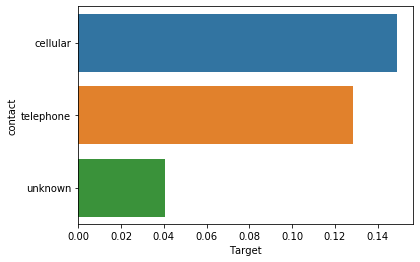

In [101]:
# 3. Contact
contact_Target_corr = bank_data_no_outlier[['contact', 'Target']].groupby('contact').mean().reset_index().sort_values('Target', ascending=False)
sns.barplot(y = 'contact', x = 'Target',data = contact_Target_corr)
print(contact_Target_corr)

#### The above graph shows very less score for unkown as compared to cellular and telephone, hence its okay to consider the unknown as cellular.

['cellular' 'telephone']
     contact    Target
1  telephone  0.128383
0   cellular  0.115630


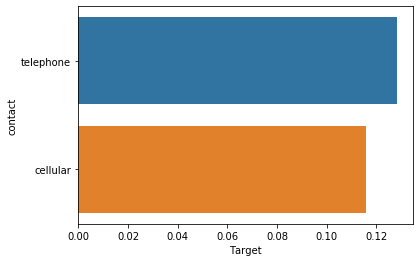

In [102]:
# Replacing 'unknown' with 'cellular' for bank_data_no_outlier['contact']
bank_data_no_outlier.loc[bank_data_no_outlier.contact == 'unknown', 'contact'] = 'cellular'
print(bank_data_no_outlier['contact'].unique())
contact_Target_corr_new = bank_data_no_outlier[['contact', 'Target']].groupby('contact').mean().reset_index().sort_values('Target', ascending=False)
sns.barplot(y = 'contact', x = 'Target',data = contact_Target_corr_new)
print(contact_Target_corr_new)

  poutcome    Target
2  success  0.653297
1    other  0.165929
0  failure  0.125876
3  unknown  0.091226


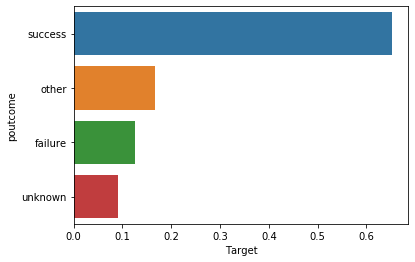

In [103]:
# 4. POutcome
poutcome_Target_corr = bank_data_no_outlier[['poutcome', 'Target']].groupby("poutcome").mean().reset_index().sort_values("Target", ascending=False)
sns.barplot(y = "poutcome", x = 'Target',data = poutcome_Target_corr)
print(poutcome_Target_corr)

### Observations :

1. Average outcome of previous such campaigns have been mostly successful.
2. The above graph shows close score for failure and unkown, hence its okay to consider the unknown as failure.

['failure' 'other' 'success']
  poutcome    Target
2  success  0.653297
1    other  0.165929
0  failure  0.095269


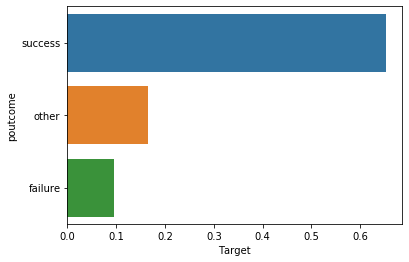

In [104]:
# Replacing 'unknown' with 'failure' for bank_data_no_outlier['poutcome']
bank_data_no_outlier.loc[bank_data_no_outlier.poutcome == 'unknown', 'poutcome'] = 'failure'
print(bank_data_no_outlier['poutcome'].unique())
poutcome_Target_corr_new = bank_data_no_outlier[['poutcome', 'Target']].groupby('poutcome').mean().reset_index().sort_values('poutcome', ascending=False)
sns.barplot(y = 'poutcome', x = 'Target',data = poutcome_Target_corr_new)
print(poutcome_Target_corr_new)

    marital    Target
2    single  0.149464
0  divorced  0.117911
1   married  0.100456


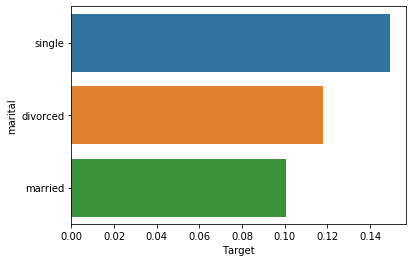

In [105]:
# 5. Marital
marital_Target_corr = bank_data_no_outlier[['marital', 'Target']].groupby("marital").mean().reset_index().sort_values("Target", ascending=False)
sns.barplot(y = "marital", x = 'Target',data = marital_Target_corr)
print(marital_Target_corr)

#### On an average, single customers participated more in such campaigns than married or divorced customers. 

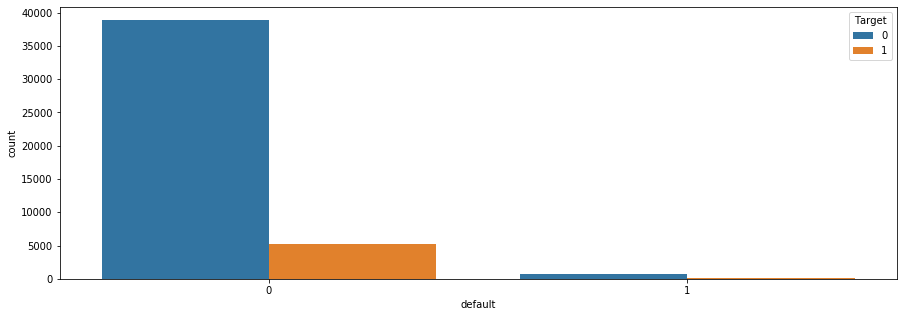

In [106]:
# 6. Default
fig, axes = plt.subplots(1,1, figsize = (15,5))
sns.countplot(x = bank_data_no_outlier['default'], hue = bank_data_no_outlier["Target"])

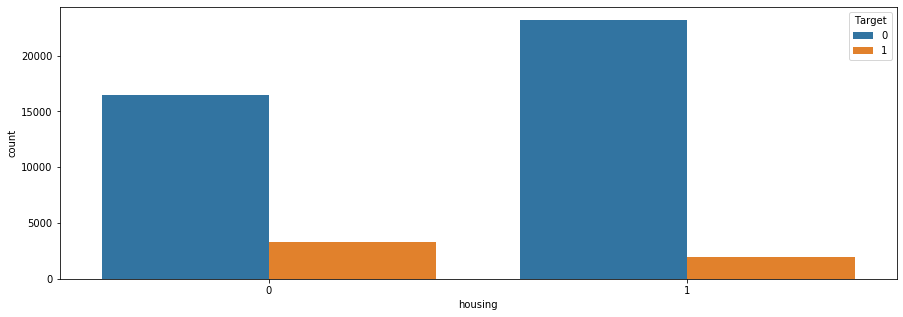

In [107]:
# 7. Housing
fig, axes = plt.subplots(1,1, figsize = (15,5))
sns.countplot(x = bank_data_no_outlier['housing'], hue = bank_data_no_outlier["Target"])

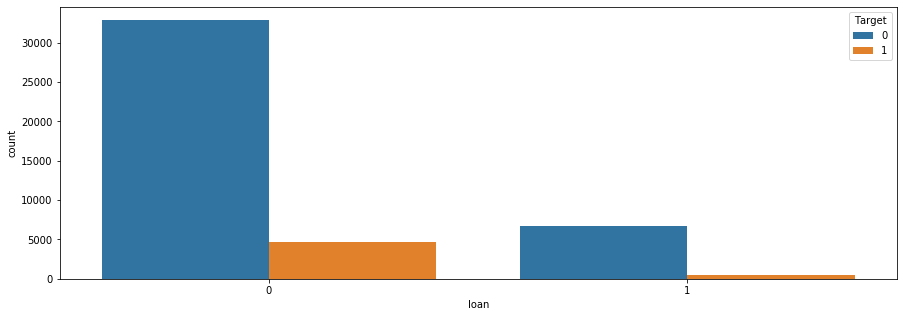

In [108]:
# 8. Loan
fig, axes = plt.subplots(1,1, figsize = (15,5))
sns.countplot(x = bank_data_no_outlier['loan'], hue = bank_data_no_outlier["Target"])

In [109]:
Target_summary = bank_data_no_outlier.groupby("Target")
Target_summary.mean().reset_index()

,Target,index,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
0,0,21064.248682,40.594886,0.019242,1295.273119,0.584899,0.170428,15.900966,220.836028,2.850377,36.318942,0.498373
1,1,33127.018760,41.154862,0.009954,1767.990812,0.370406,0.092649,15.149885,538.357198,2.142037,68.626914,1.165008


### Observations:

1. Average balance of subscribers for term deposit is more than non subscribers.
2. Average duration of call is also more for subscribers than non subscribers.
3. Average number of days passed since last contact(pdays) is also high for subscribers than non subscribers.

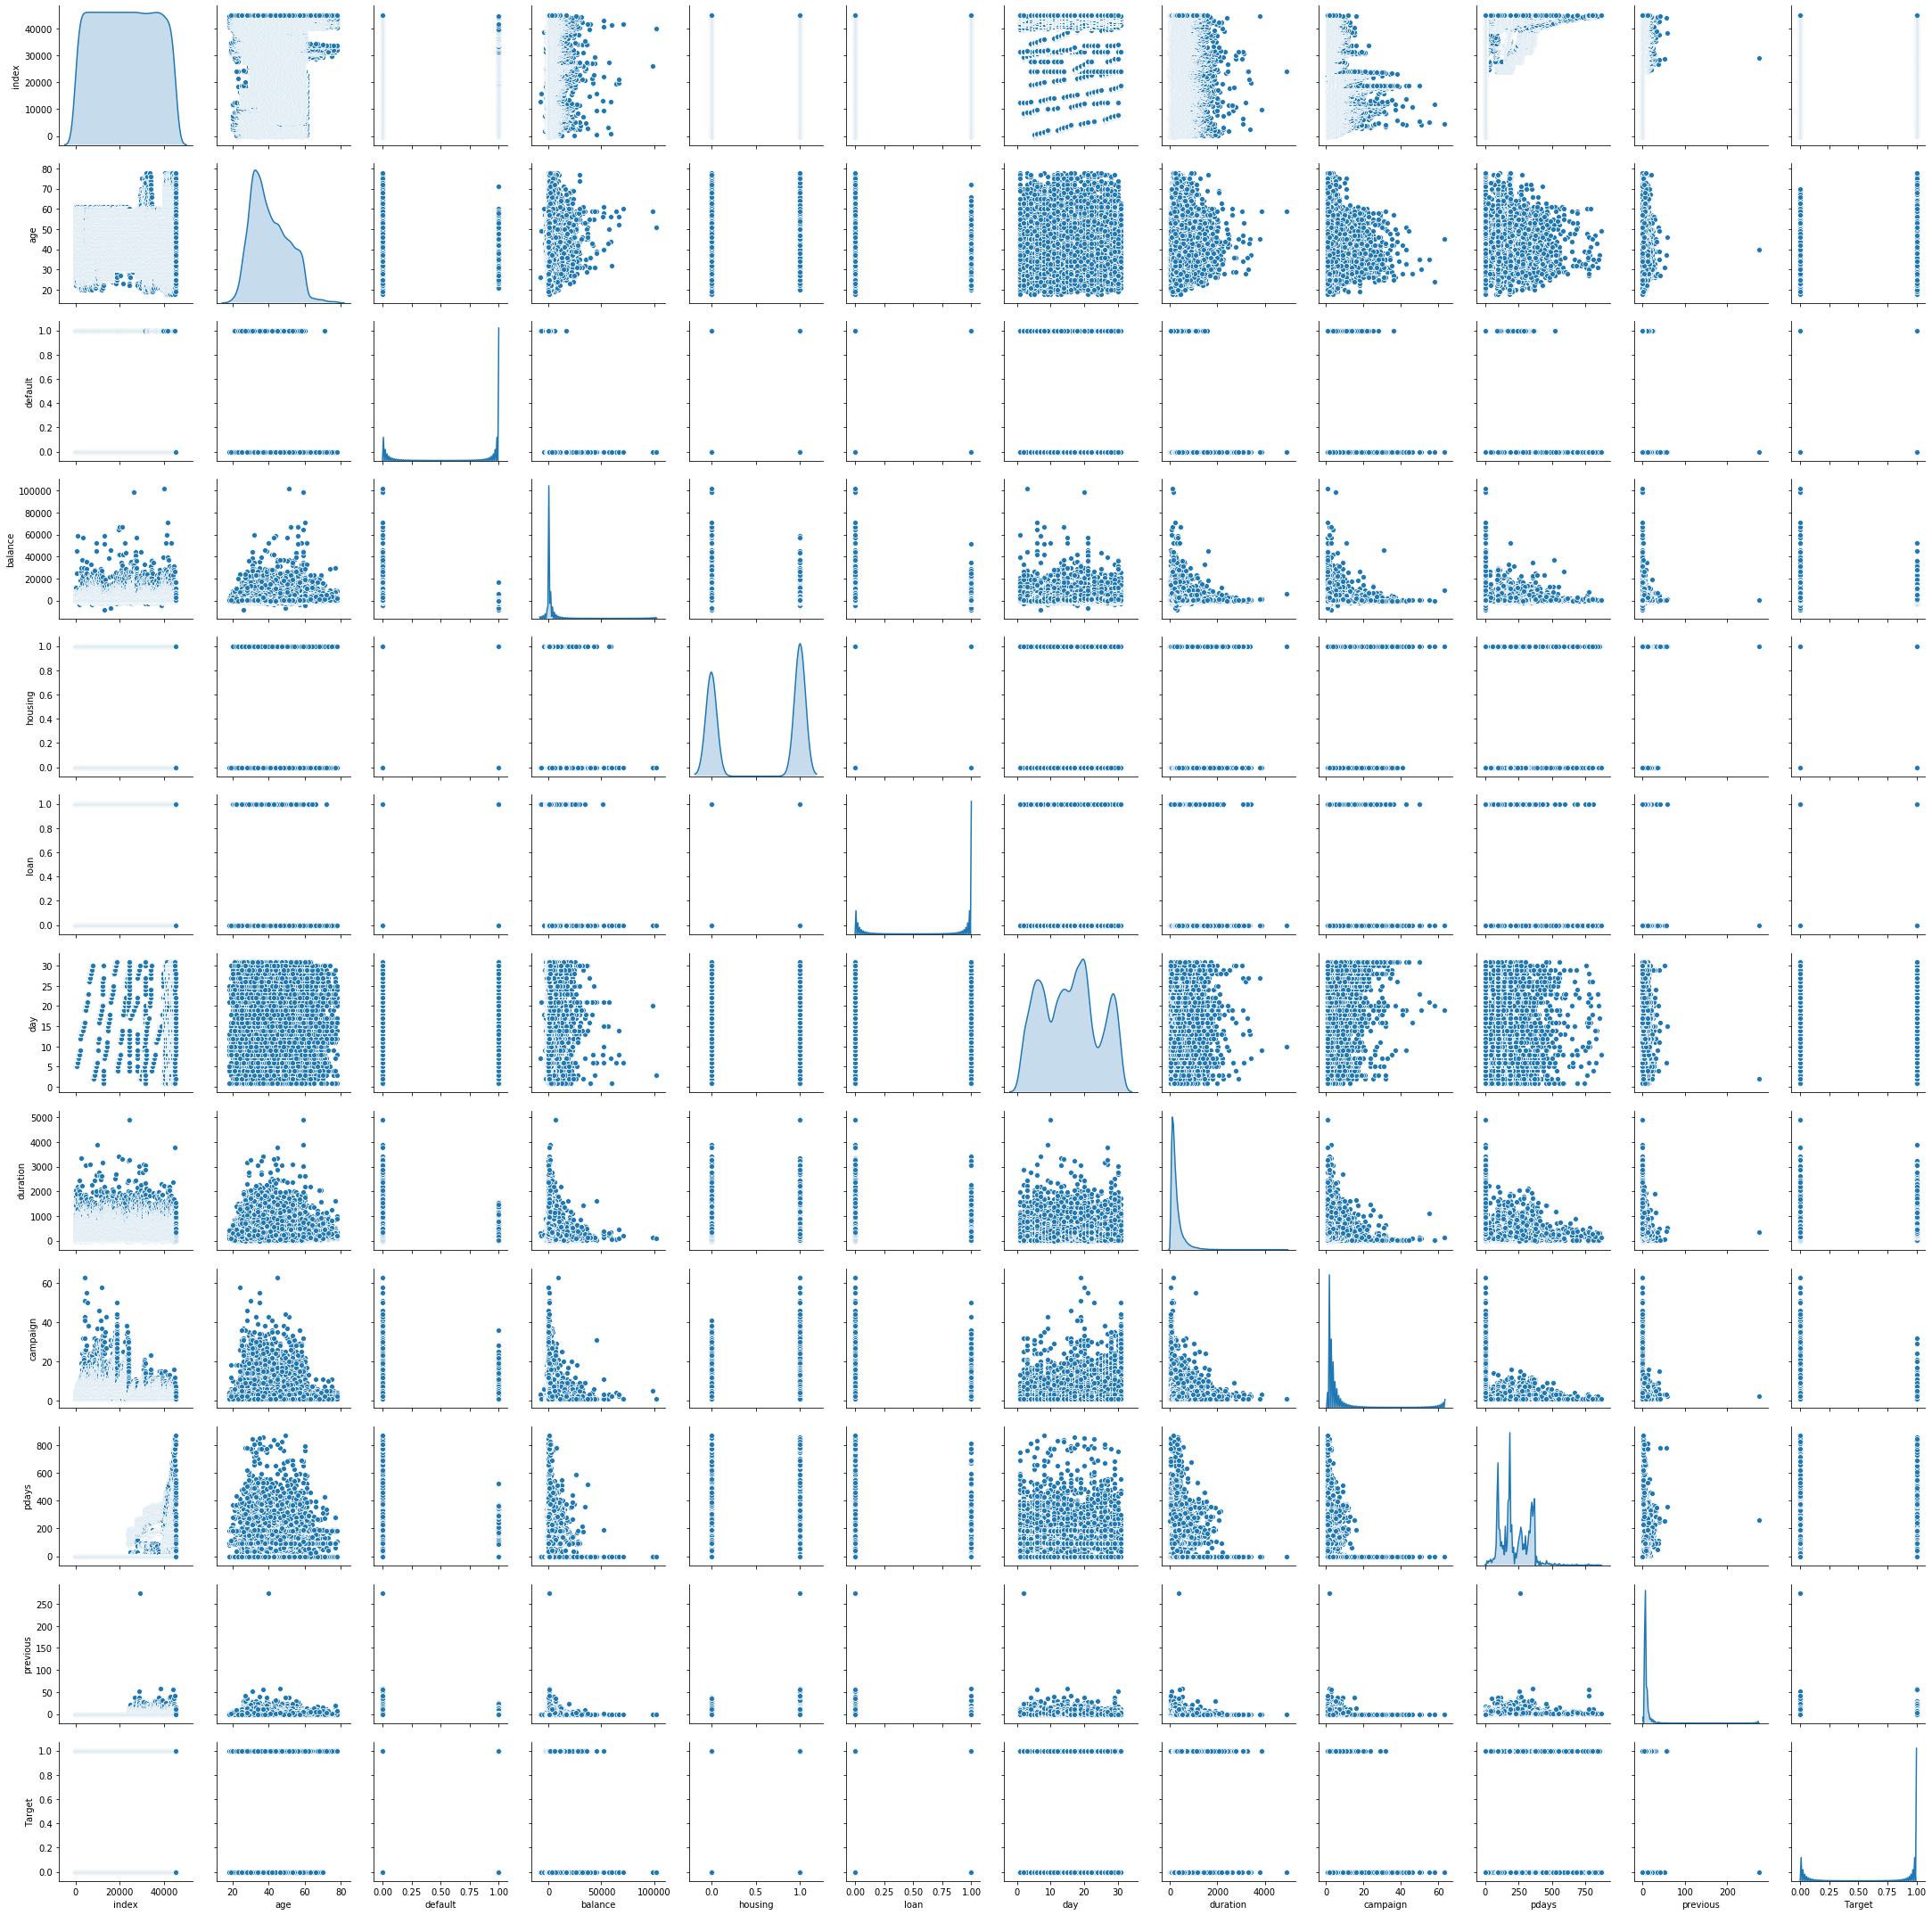

In [110]:
# Multivariate Analysis
sns.pairplot(bank_data_no_outlier, diag_kind='kde')

In [111]:
# Dropping unnecessary columns from dataset
bank_data_no_outlier.drop(columns=['duration','index'],axis=1,inplace=True)

In [112]:
print(bank_data_no_outlier.columns.unique())
print(bank_data_no_outlier.count()[0])

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'Target'],
      dtype='object')
44877


In [113]:
X = bank_data_no_outlier.drop('Target',axis=1)
y = bank_data_no_outlier['Target']

In [114]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,44877.0,40.660071,10.152831,18.0,33.0,39.0,48.0,78.0
default,44877.0,0.018161,0.133534,0.0,0.0,0.0,0.0,1.0
balance,44877.0,1350.300800,2987.398764,-8019.0,71.0,445.0,1415.0,102127.0
housing,44877.0,0.559930,0.496401,0.0,0.0,1.0,1.0,1.0
loan,44877.0,0.161374,0.367880,0.0,0.0,0.0,0.0,1.0
day,44877.0,15.813535,8.322364,1.0,8.0,16.0,21.0,31.0
campaign,44877.0,2.767921,3.104954,1.0,1.0,2.0,3.0,63.0
pdays,44877.0,40.079818,100.168843,-1.0,-1.0,-1.0,-1.0,871.0
previous,44877.0,0.575974,2.302257,0.0,0.0,0.0,0.0,275.0


#### Since 'balance' column has higher values than other columns, it may affect the final outcome. Hence, we will have to scale the dataset first.

In [115]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44877 entries, 0 to 44876
Data columns (total 15 columns):
age          44877 non-null int64
job          44877 non-null object
marital      44877 non-null object
education    44877 non-null object
default      44877 non-null int64
balance      44877 non-null int64
housing      44877 non-null int64
loan         44877 non-null int64
contact      44877 non-null object
day          44877 non-null int64
month        44877 non-null object
campaign     44877 non-null int64
pdays        44877 non-null int64
previous     44877 non-null int64
poutcome     44877 non-null object
dtypes: int64(9), object(6)
memory usage: 5.1+ MB


In [116]:
# First step would be convert all non-numerical (string) columns into numerical columns
job_new = pd.get_dummies(X['job'])
marital_new = pd.get_dummies(X['marital'])
education_new = pd.get_dummies(X['education'])
contact_new = pd.get_dummies(X['contact'])
month_new = pd.get_dummies(X['month'])
poutcome_new = pd.get_dummies(X['poutcome'])
X_new = pd.concat([X,job_new,marital_new,education_new,contact_new,month_new,poutcome_new],axis=1)
X_new = X_new.drop(columns=['job','marital','education','contact','month','poutcome'])

In [117]:
X_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,44877.0,40.660071,10.152831,18.0,33.0,39.0,48.0,78.0
default,44877.0,0.018161,0.133534,0.0,0.0,0.0,0.0,1.0
balance,44877.0,1350.300800,2987.398764,-8019.0,71.0,445.0,1415.0,102127.0
housing,44877.0,0.559930,0.496401,0.0,0.0,1.0,1.0,1.0
loan,44877.0,0.161374,0.367880,0.0,0.0,0.0,0.0,1.0
day,44877.0,15.813535,8.322364,1.0,8.0,16.0,21.0,31.0
campaign,44877.0,2.767921,3.104954,1.0,1.0,2.0,3.0,63.0
pdays,44877.0,40.079818,100.168843,-1.0,-1.0,-1.0,-1.0,871.0
previous,44877.0,0.575974,2.302257,0.0,0.0,0.0,0.0,275.0
admin.,44877.0,0.115181,0.319244,0.0,0.0,0.0,0.0,1.0


In [118]:
from scipy.stats import zscore
X_scaled = X_new.apply(zscore)
X_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,44877.0,-1.211597e-15,1.000011,-2.231922,-0.754485,-0.163510,0.722952,3.677826
default,44877.0,2.004298e-14,1.000011,-0.136002,-0.136002,-0.136002,-0.136002,7.352809
balance,44877.0,-3.209251e-15,1.000011,-3.136309,-0.428237,-0.303043,0.021658,33.734305
housing,44877.0,-3.585892e-14,1.000011,-1.127993,-1.127993,0.886530,0.886530,0.886530
loan,44877.0,7.139065e-15,1.000011,-0.438665,-0.438665,-0.438665,-0.438665,2.279642
day,44877.0,1.218169e-15,1.000011,-1.779987,-0.938871,0.022406,0.623203,1.824798
campaign,44877.0,-1.398991e-14,1.000011,-0.569394,-0.569394,-0.247324,0.074746,19.398917
pdays,44877.0,1.698903e-14,1.000011,-0.410110,-0.410110,-0.410110,-0.410110,8.295288
previous,44877.0,-1.170142e-13,1.000011,-0.250181,-0.250181,-0.250181,-0.250181,119.199144
admin.,44877.0,-1.513969e-14,1.000011,-0.360798,-0.360798,-0.360798,-0.360798,2.771633


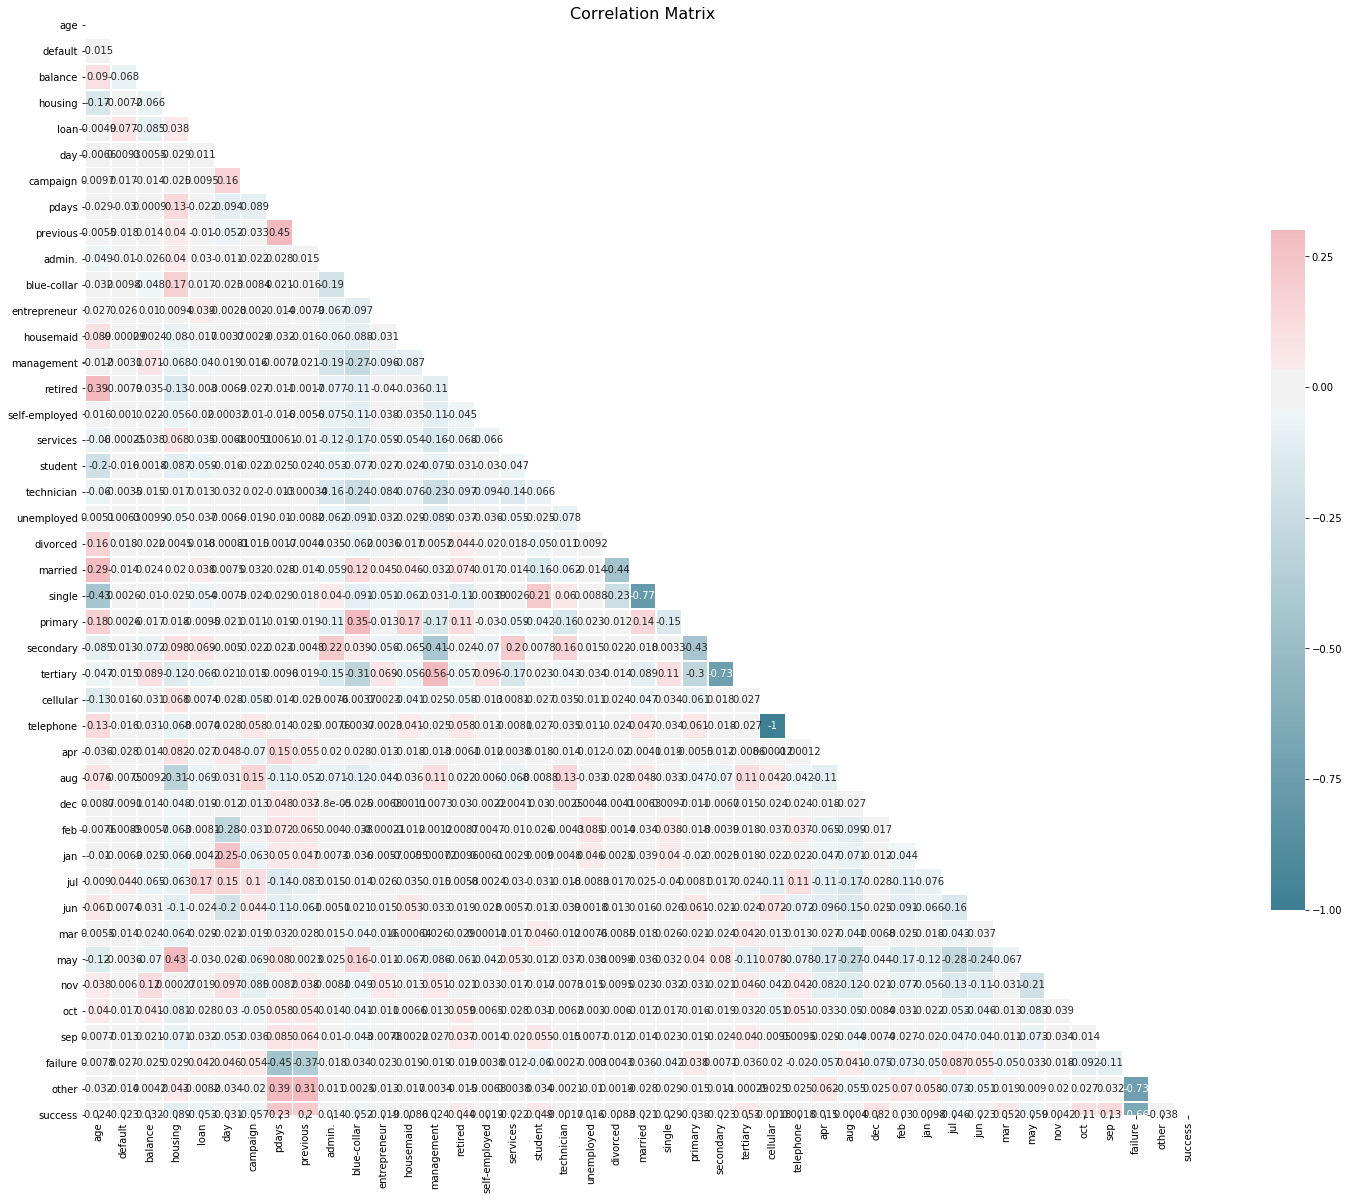

In [119]:
# Compute the correlation matrix
corr = X_scaled.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))
plt.title("Correlation Matrix", fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

In [120]:
# Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc.
from sklearn import model_selection
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=1)

In [121]:
# Train a few standard classification algorithms, note and comment on their performances across different classification 
# metrics.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, roc_auc_score

# 1. Logistic Regression
# Fit the model on train
logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train, y_train)

#predict on test
y_predict_logreg = logreg.predict(X_test)

coef_df = pd.DataFrame(logreg.coef_)
coef_df['intercept'] = logreg.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.021246 -0.016301  0.059627 -0.278752 -0.147564 -0.017756 -0.280493   

          7         8         9  ...     34        35       36       37  \
0  0.022439  0.075518  0.009838  ... -0.012  0.182699 -0.14047 -0.04477   

         38        39        40        41        42  intercept  
0  0.153955  0.132479 -0.158894 -0.065737  0.304835  -2.315687  

[1 rows x 44 columns]


In [122]:
logreg_model_score = logreg.score(X_test, y_test)

In [123]:
# Classification Report
print("Classification Report")
print(metrics.classification_report(y_test, y_predict_logreg, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.19      0.29      1544
           0       0.90      0.99      0.94     11920

    accuracy                           0.89     13464
   macro avg       0.76      0.59      0.61     13464
weighted avg       0.87      0.89      0.87     13464



In [124]:
# Appending the accuracy to a dictionary for further analysis
dict_accuracy_classifiers = {
    "Logistic Regression": logreg_model_score
}

In [125]:
# 2. Support Vector Machines
from sklearn.svm import SVC

svm = SVC(gamma='scale')
svm.fit(X_train, y_train)
y_predict_svm = svm.predict(X_test)

svm_model_score = svm.score(X_test, y_test)

In [126]:
# Classification Report
print("Classification Report")
print(metrics.classification_report(y_test, y_predict_svm, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.20      0.30      1544
           0       0.90      0.98      0.94     11920

    accuracy                           0.89     13464
   macro avg       0.76      0.59      0.62     13464
weighted avg       0.87      0.89      0.87     13464



In [127]:
dict_accuracy_classifiers['SVM Classifier'] = svm_model_score

In [128]:
# 3. K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_predict_knn = knn.predict(X_test)
knn_model_score = metrics.accuracy_score(y_test, y_predict_knn)

In [129]:
# Classification Report
print("Classification Report")
print(metrics.classification_report(y_test, y_predict_knn, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.30      0.29      0.29      1544
           0       0.91      0.91      0.91     11920

    accuracy                           0.84     13464
   macro avg       0.60      0.60      0.60     13464
weighted avg       0.84      0.84      0.84     13464



In [130]:
dict_accuracy_classifiers['KNN Classifier'] = knn_model_score

In [131]:
# 4. Naive-Bayes Classifier
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [132]:
y_predict_NB = nb_model.predict(X_test)
nb_model_score = metrics.accuracy_score(y_test, y_predict_NB)

In [133]:
# Classification Report
print("Classification Report")
print(metrics.classification_report(y_test, y_predict_NB, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.36      0.41      0.38      1544
           0       0.92      0.91      0.91     11920

    accuracy                           0.85     13464
   macro avg       0.64      0.66      0.65     13464
weighted avg       0.86      0.85      0.85     13464



In [134]:
dict_accuracy_classifiers['Naive-Bayes Classifier'] = nb_model_score

In [135]:
# Build the ensemble models and compare the results with the base models.
# 1. Bagging Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
cart = DecisionTreeClassifier()
bag_model = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=7, n_jobs=-1)
results = model_selection.cross_val_score(bag_model, X_scaled, y, cv=kfold)
bag_model_score = results.mean()
dict_accuracy_classifiers['Bagging Classifier'] = bag_model_score

In [136]:
# 2. Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
kfold = model_selection.KFold(n_splits=10, random_state=7)
gradboost_model = GradientBoostingClassifier(n_estimators=100, random_state=7)
results = model_selection.cross_val_score(gradboost_model, X_scaled, y, cv=kfold)
gradboost_model_score = results.mean()
dict_accuracy_classifiers['Gradient Boosting Classifier'] = gradboost_model_score

In [137]:
# 3. Adaptive Boosting Classifier
from sklearn.ensemble import AdaBoostClassifier
kfold = model_selection.KFold(n_splits=10, random_state=7)
adaboost_model = AdaBoostClassifier(n_estimators=30, random_state=7)
results = model_selection.cross_val_score(adaboost_model, X_scaled, y, cv=kfold, n_jobs=-1)
adaboost_model_score = results.mean()
dict_accuracy_classifiers['Adaptive Boosting Classifier'] = adaboost_model_score

In [ ]:
# 4. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
kfold = model_selection.KFold(n_splits=10, random_state=7)
randforest_model = RandomForestClassifier(n_estimators=100, max_features=3, n_jobs=-1)
results = model_selection.cross_val_score(randforest_model, X_scaled, y, cv=kfold)
randforest_model_score = results.mean()
dict_accuracy_classifiers['Random Forest Classifier'] = randforest_model_score

In [ ]:
# Compare performances of all the models
print("Performance comparison of all the models is as below : \n")
for dict_key in sorted(dict_accuracy_classifiers, key=dict_accuracy_classifiers.get, reverse=True):
    print(dict_key, dict_accuracy_classifiers[dict_key])

## Conclusion : 
**Out of all the classification models used to train the given dataset, SVM Classifier performed the best with 89.42% accuracy.**